1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

From the diagram we choose (0.5, 0,75) and (-0.5, -0,75) for initial guesses.

FIRST global minima: [-0.08984183  0.71265608]
function value: -1.031628453488966 

SECOND global minima: [ 0.08984182 -0.7126561 ]
function value: -1.031628453489024 

solution if INITIAL guess=[0,0] and default method: [0. 0.]
function value: 0.0
This is obviously wrong. So we change the default method to another, for example Nelder-Mead.

solution if initial guess=[0,0] with 'Nelder-Mead' METHOD: [-0.08985145  0.71266538]
function value: -1.031628452567338 



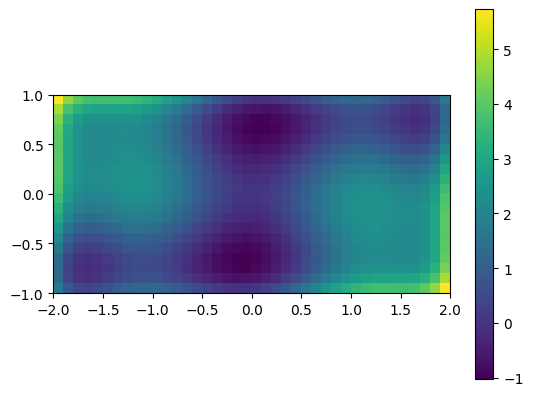

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2


x = np.linspace(-2, 2, 40)
y = np.linspace(-1, 1, 20)
x1, y1 = np.meshgrid(x, y)
plt.figure()
plt.imshow(f([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()

print("From the diagram we choose (0.5, 0,75) and (-0.5, -0,75) for initial guesses.\n")
solution = optimize.minimize(f, [0.5, 0.75])
print("FIRST global minima:" ,solution['x'])
print("function value:", f(solution['x']),"\n")

solution = optimize.minimize(f, [-0.5, -0.75])
print("SECOND global minima:" ,solution['x'])
print("function value:", f(solution['x']),"\n")

solution = optimize.minimize(f, [0, 0])
print("solution if INITIAL guess=[0,0] and default method:" ,solution['x'])
print("function value:", f(solution['x']))
print("This is obviously wrong. So we change the default method to another, for example Nelder-Mead.\n")
solution = optimize.minimize(f, [0, 0], method='Nelder-Mead')
print("solution if initial guess=[0,0] with 'Nelder-Mead' METHOD:" ,solution['x'])
print("function value:", f(solution['x']),"\n")

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Chaotic motion depends on amplitude of motion and of course frequency of impled force.
If frequency of force in near natural frequency and if amplitude is big enough that
sin(theta) != theta, then chaos can happen. Last diagram is an example.




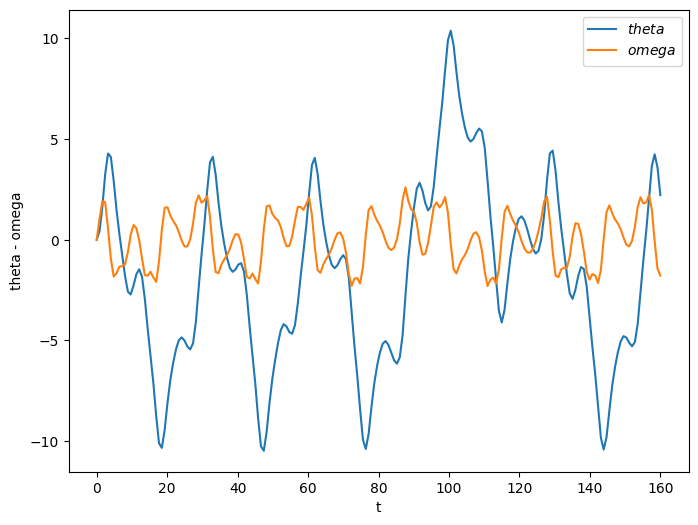

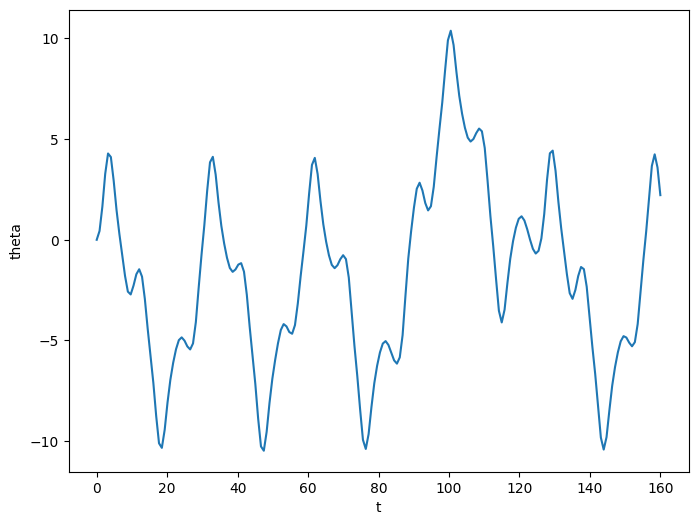

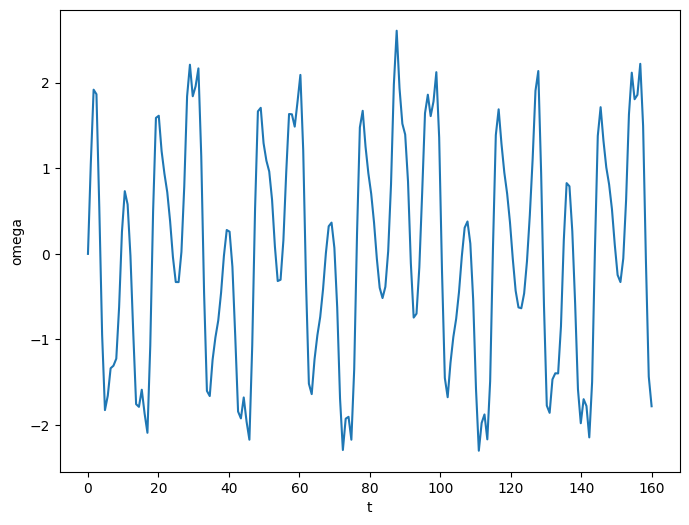

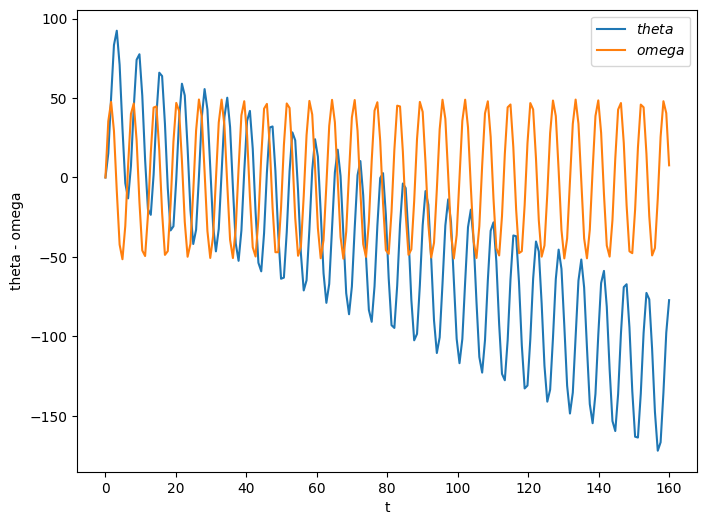

In [50]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def der(v, time, q, d, omega):
    return [v[1], -1/q * v[1] + np.sin(v[0]) + d*np.cos(omega*time)] 

q = 2
d = 1.5
omega = 0.65
t = np.linspace(0, 160, 200)
v_init = (0, 0)
V = odeint(der, v_init, t, args=(q, d, omega))

plt.figure(figsize=(8, 6))
plt.plot(t, V[:, 0], label="$theta$")
plt.plot(t, V[:, 1], label="$omega$")
plt.xlabel('t')
plt.ylabel('theta - omega')
plt.legend(loc='best')

plt.figure(figsize=(8, 6))
plt.plot(t, V[:, 0])
plt.xlabel('t')
plt.ylabel('theta')

plt.figure(figsize=(8, 6))
plt.plot(t, V[:, 1])
plt.xlabel('t')
plt.ylabel('omega')



# Chaotic motion depends on amplitude of motion and of course frequency of impled force.
# If frequency of force in near natural frequency and if amplitude is big enough that 
# sin(theta) != theta, then chaos can happen. Below is an example.
print("Chaotic motion depends on amplitude of motion and of course frequency of impled force.")
print("If frequency of force in near natural frequency and if amplitude is big enough that")
print("sin(theta) != theta, then chaos can happen. Last diagram is an example.\n\n")
q = 20
d = 50
omega = 1
t = np.linspace(0, 160, 200)
v_init = (0, 0)
V = odeint(der, v_init, t, args=(q, d, omega))

plt.figure(figsize=(8, 6))
plt.plot(t, V[:, 0], label="$theta$")
plt.plot(t, V[:, 1], label="$omega$")
plt.xlabel('t')
plt.ylabel('theta - omega')
plt.legend(loc='best')


!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

Lynxes ========
Peak frequency: 0.09523809523809523
Periodicity (1/freq): 10.5 years.

Hares ========
Peak frequency: 0.09523809523809523
Periodicity (1/freq): 10.5 years.

This periods canbe seen in population diagram (e.g. '1913 - 1902 ~= 10.5' for hares).



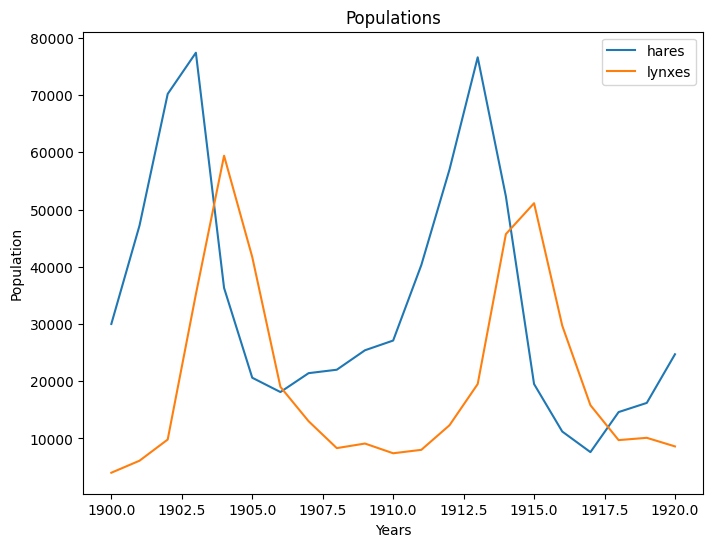

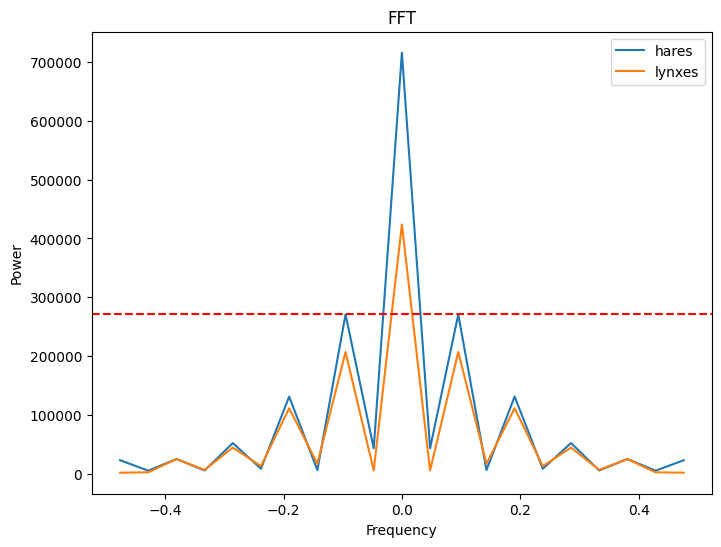

In [51]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/populations.txt')
year, hare, lynxe, carrot = data.T


fft_lynxes = fftpack.fft(lynxe)
power_lynxes = np.abs(fft_lynxes)
sample_freq = fftpack.fftfreq(fft_lynxes.size)

pos_mask = np.where(sample_freq > 0)
freqs_lynxes = sample_freq[pos_mask]
powes_lynxes = power_lynxes[pos_mask]
# find the max of freqs array
peak_freq = freqs_lynxes[powes_lynxes.argmax()]
print("Lynxes ========")
print("Peak frequency:", peak_freq)
print("Periodicity (1/freq):", 1/peak_freq, "years.\n")


fft_hares = fftpack.fft(hare)
power_hares = np.abs(fft_hares)
sample_freq = fftpack.fftfreq(fft_hares.size)

pos_mask = np.where(sample_freq > 0)
freqs_hares = sample_freq[pos_mask]
powes_hares = power_hares[pos_mask]
# find the max of freqs array
peak_freq = freqs_hares[powes_hares.argmax()]
print("Hares ========")
print("Peak frequency:", peak_freq)
print("Periodicity (1/freq):", 1/peak_freq, "years.\n")

print("This periods canbe seen in population diagram (e.g. '1913 - 1902 ~= 10.5' for hares).\n")

sample_freq = fftpack.fftfreq(fft_lynxes.size)
i = sample_freq.argsort()

plt.figure(figsize=(8, 6))
plt.plot(year,hare, label='hares')
plt.plot(year,lynxe, label='lynxes')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Populations')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(sample_freq[i], power_hares[i], label='hares')
plt.plot(sample_freq[i], power_lynxes[i], label='lynxes')
plt.axhline(powes_hares[powes_hares.argmax()], color='r', ls='--')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(('Hares', 'Lynxs'), loc='best')
plt.title("FFT")
plt.legend()
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.

* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Original Image')

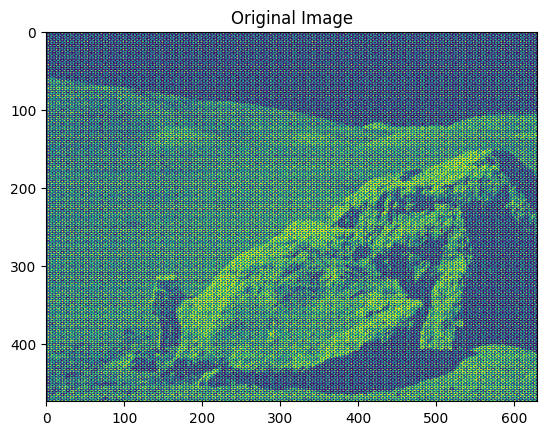

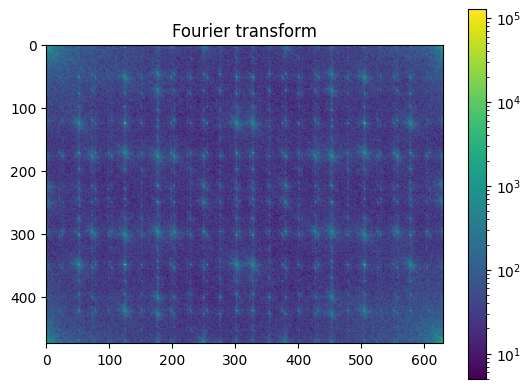

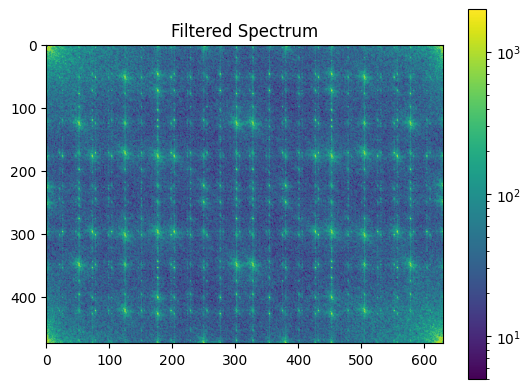

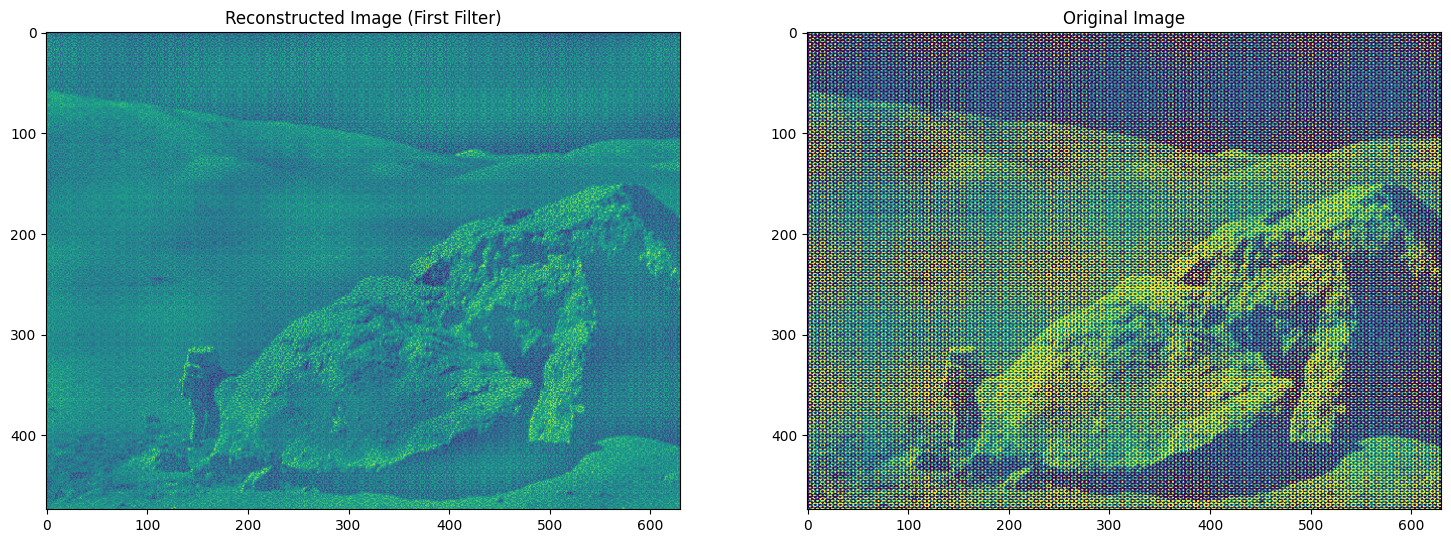

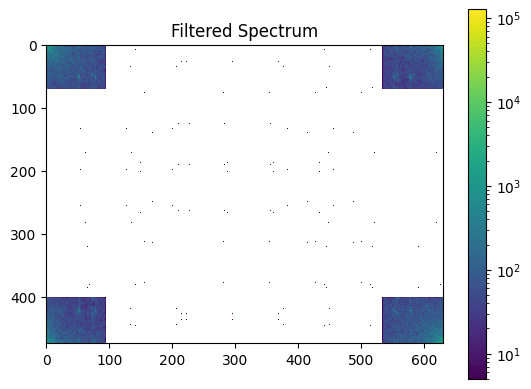

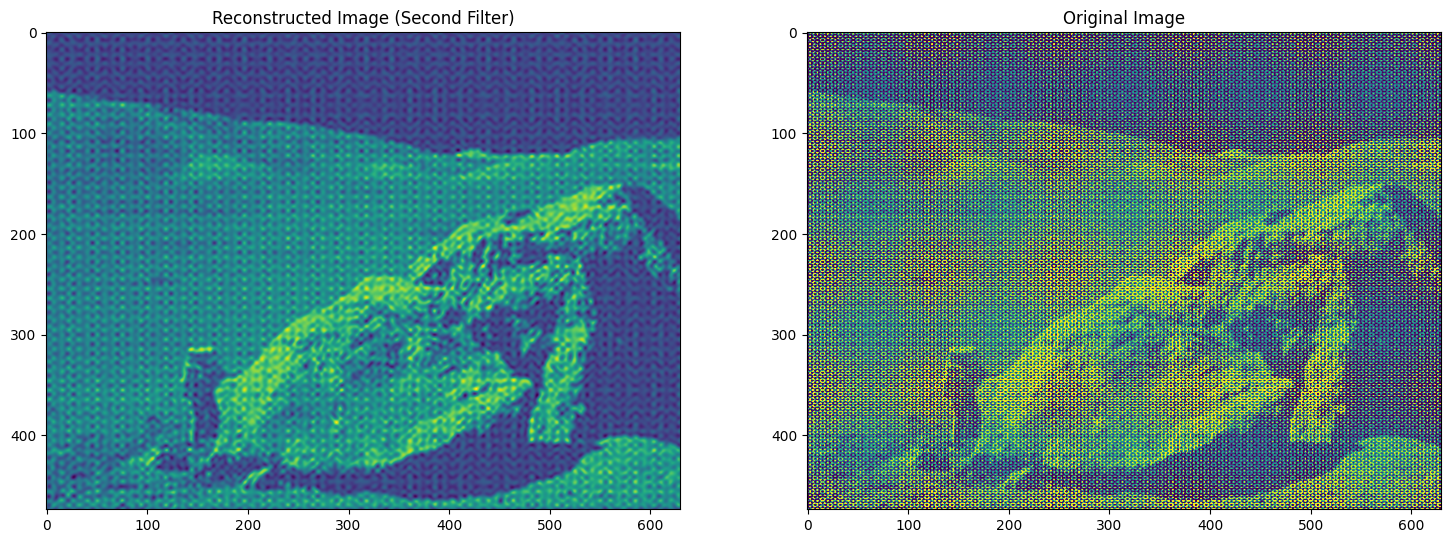

In [101]:
from matplotlib.colors import LogNorm

img = plt.imread("images/moonlanding.png")
plt.title('Original Image')
plt.imshow(img)

image_fft = fftpack.fft2(img)

plt.figure()
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')


# First Filter
image_fft2 = image_fft.copy()
mask = np.abs(image_fft2) > 2000
image_fft2[mask] = 0

plt.figure()
plt.imshow(np.abs(image_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')


im_new = fftpack.ifft2(image_fft2).real
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) 
ax1.imshow(im_new)
ax1.set_title('Reconstructed Image (First Filter)')
ax2.imshow(img)
ax2.set_title('Original Image')


# Second Filter
image_fft3 = image_fft.copy()
rows, cols = image_fft3.shape
image_fft3[int(0.15*rows):int(0.85*rows),:] = 0
image_fft3[:, int(0.15*cols):int(0.85*cols)] = 0


plt.figure()
plt.imshow(np.abs(image_fft3), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

im_new = fftpack.ifft2(image_fft3).real

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) 
ax1.imshow(im_new)
ax1.set_title('Reconstructed Image (Second Filter)')
ax2.imshow(img)
ax2.set_title('Original Image')